In [2]:
# Calling   all librarries need to project

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import klib
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score


In [3]:
# Downlouding data_set

df=pd.read_csv("london_houses.csv")


# Introduction with Data_set

In [5]:
df.head(3)

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(11)
memory usa

In [7]:
# data cleaning with klib

df=klib.data_cleaning(df)


Shape of cleaned data: (1000, 17) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.1 MB (-76.92%)



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   address          1000 non-null   string  
 1   neighborhood     1000 non-null   category
 2   bedrooms         1000 non-null   int8    
 3   bathrooms        1000 non-null   int8    
 4   square_meters    1000 non-null   int16   
 5   building_age     1000 non-null   int8    
 6   garden           1000 non-null   category
 7   garage           1000 non-null   category
 8   floors           1000 non-null   int8    
 9   property_type    1000 non-null   category
 10  heating_type     1000 non-null   category
 11  balcony          1000 non-null   category
 12  interior_style   1000 non-null   category
 13  view             1000 non-null   category
 14  materials        1000 non-null   category
 15  building_status  1000 non-null   category
 16  price_£          1000 non-null   int32   
d

In [9]:
# checking missing values in data_set

df.isnull().sum()

address            0
neighborhood       0
bedrooms           0
bathrooms          0
square_meters      0
building_age       0
garden             0
garage             0
floors             0
property_type      0
heating_type       0
balcony            0
interior_style     0
view               0
materials          0
building_status    0
price_£            0
dtype: int64

In [20]:
# Selecting numerical and caregorical columns

categorical_col=df.select_dtypes(include=["string","category"]).columns.tolist()
print(f"CATEGORICAL COLUMNS:\n{categorical_col}")
print(f"TOTAL NUMBER OF CATEGORICAL COLUMNS: {len(categorical_col)}") 

numerical_col=df.select_dtypes(include=["int8","int16","int32"]).columns.tolist()
print(f"\nNUMERICAL COLUMNS:{numerical_col}")
print(f"TOTAL NUMBER OF NUMERICAL COLUMNS:{len(numerical_col)}") 
                                            
                                        


CATEGORICAL COLUMNS:
['address', 'neighborhood', 'garden', 'garage', 'property_type', 'heating_type', 'balcony', 'interior_style', 'view', 'materials', 'building_status']
TOTAL NUMBER OF CATEGORICAL COLUMNS: 11

NUMERICAL COLUMNS:['bedrooms', 'bathrooms', 'square_meters', 'building_age', 'floors', 'price_£']
TOTAL NUMBER OF NUMERICAL COLUMNS:6


# Visualization

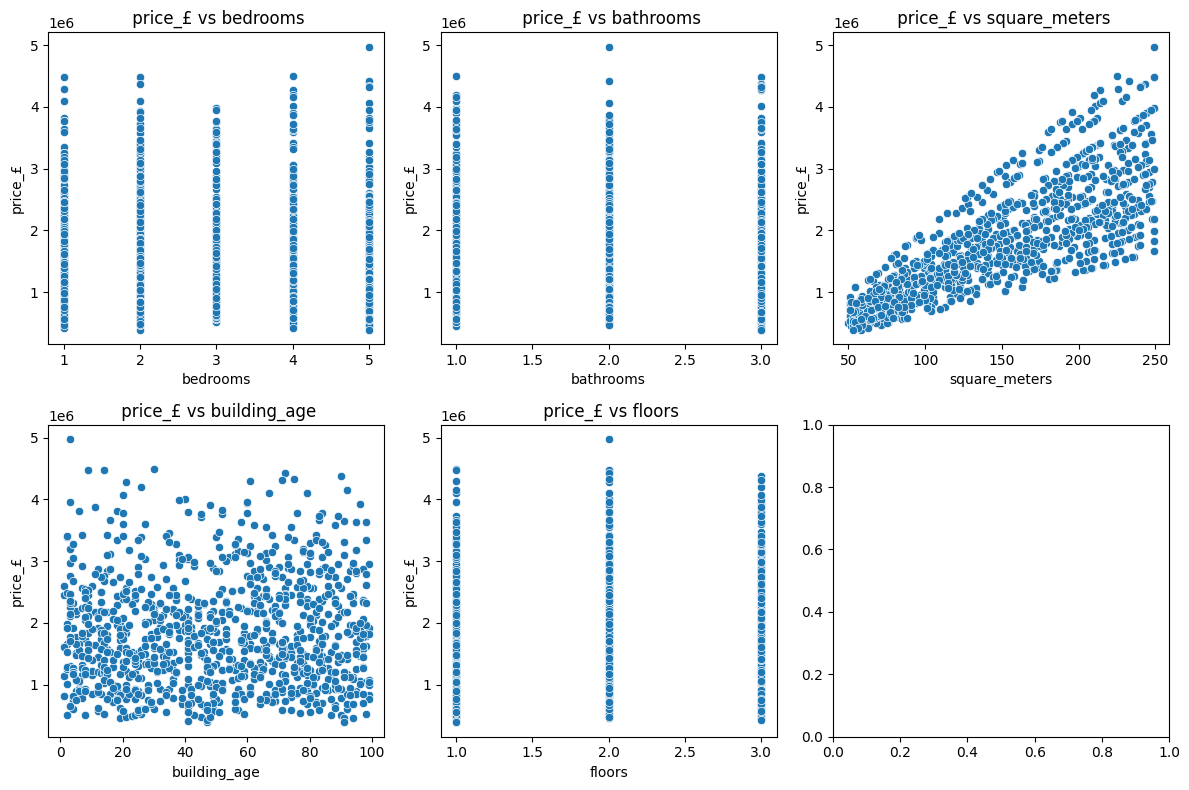

In [23]:
# Vizualization for Numerical features vs Target variable

numerical_features = ['bedrooms', 'bathrooms', 'square_meters', 'building_age', 'floors']
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    row, col = i // 3, i % 3
    sns.scatterplot(x=df[feature], y=df["price_£"], ax=axes[row, col])
    axes[row, col].set_title(f" price_£ vs {feature}")

plt.tight_layout()
plt.show()


<Axes: >

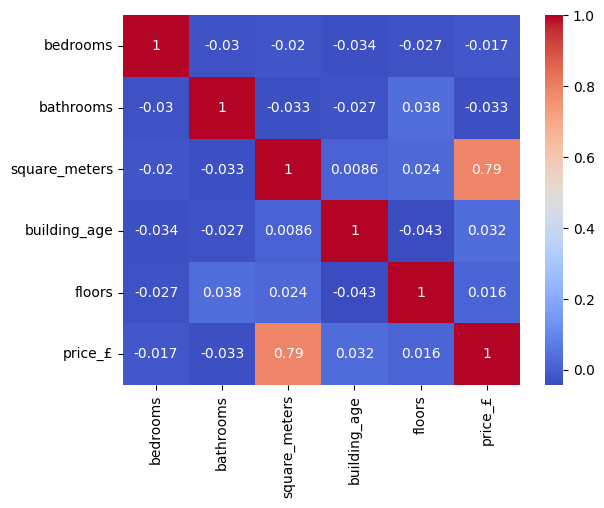

In [24]:
# Using another visualization for numerical columns vs target variable
sns.heatmap(df[numerical_col].corr(),cmap='coolwarm',annot=True) 

from this vizualization  we can see some numerical columns which are "beedrooms","bathrooms" and "floors" don't have any impact for target variable

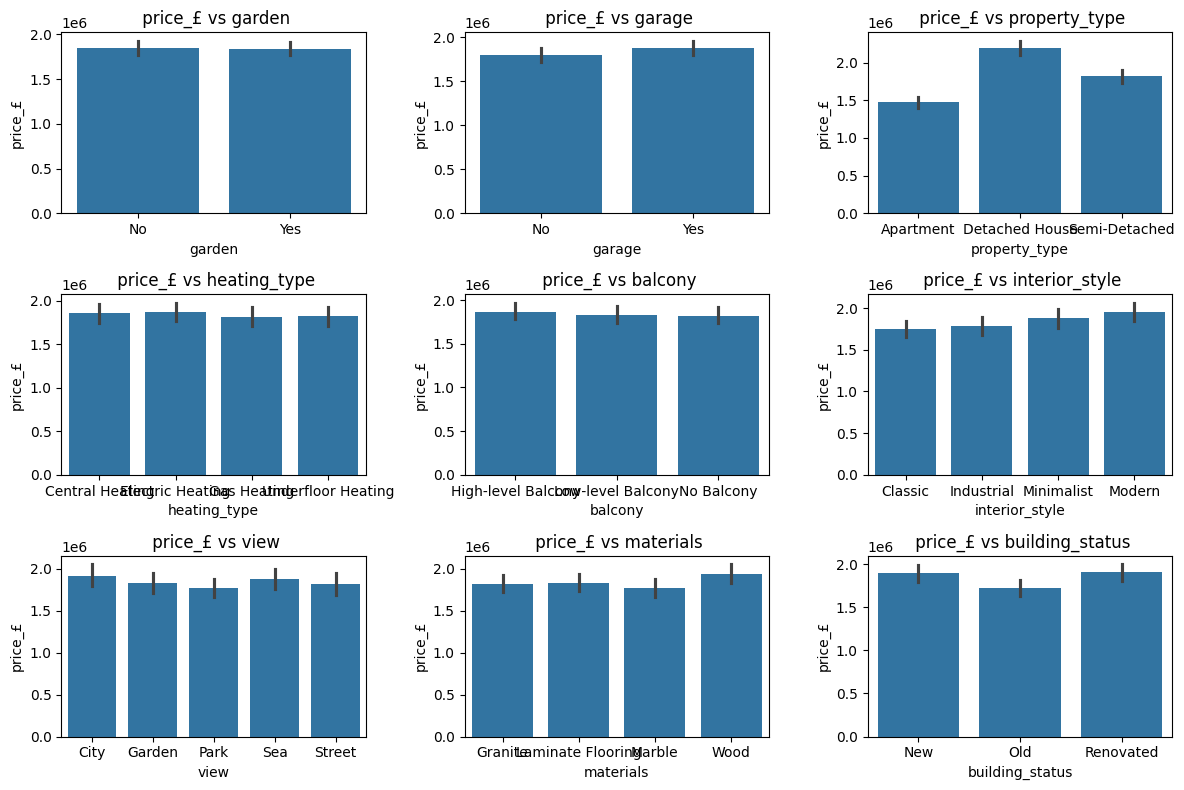

In [25]:
# Visualization for Categorical fueatures vs target variable

categorical_features = ['garden', 'garage', 'property_type', 'heating_type', 'balcony', 'interior_style', 'view', 'materials', 'building_status']
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.barplot(x=df[feature], y=df["price_£"], ax=axes[row, col])
    axes[row, col].set_title(f" price_£ vs {feature}")

plt.tight_layout()
plt.show()

# Feature Transforming

In [16]:
# Selecting numerical columuns

numerical_col=df.select_dtypes(include=["int8","int16"]).columns.tolist()
print(f"Numerical columns:\n{numerical_col}")

Numerical columns:
['bedrooms', 'bathrooms', 'square_meters', 'building_age', 'floors']


In [17]:
# calculating skewness for numerical columns

skewness=df[numerical_col].skew().sort_values(ascending=False)
print(f"Skewness of numerical features:\n{skewness}")

Skewness of numerical features:
square_meters    0.030063
floors           0.016660
bathrooms       -0.005460
building_age    -0.016103
bedrooms        -0.023222
dtype: float64


from this coding we can see all numerical features don't need mathematical feature transforming beacuse their skweness is normal

# Encoding

In [9]:
# Checking Cardinality

cardinality=df[categorical_col].nunique()
print(f"Cardinlaty of categorical columns:\n{cardinality}")

Cardinlaty of categorical columns:
address            770
neighborhood        10
garden               2
garage               2
property_type        3
heating_type         4
balcony              3
interior_style       4
view                 5
materials            4
building_status      3
dtype: int64


In [10]:
# When The number of cardinalty equal or more than 10 We can use Label Encoder and if less than 10  One-Hot Encoder

encoder=LabelEncoder()
for col in categorical_col:
    if cardinality[col]>=10:
        df[col]=encoder.fit_transform(df[col])
    else:
        df=pd.get_dummies(df,columns=[col],drop_first=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   address                          1000 non-null   int64
 1   neighborhood                     1000 non-null   int64
 2   bedrooms                         1000 non-null   int8 
 3   bathrooms                        1000 non-null   int8 
 4   square_meters                    1000 non-null   int16
 5   building_age                     1000 non-null   int8 
 6   floors                           1000 non-null   int8 
 7   price_£                          1000 non-null   int32
 8   garden_Yes                       1000 non-null   bool 
 9   garage_Yes                       1000 non-null   bool 
 10  property_type_Detached House     1000 non-null   bool 
 11  property_type_Semi-Detached      1000 non-null   bool 
 12  heating_type_Electric Heating    1000 non-null   

In [12]:
# changing from boolean dtype to int type when we used one_hot Encoder

one_hot_cols = df.select_dtypes(include=bool).columns
df[one_hot_cols] = df[one_hot_cols].astype(int)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   address                          1000 non-null   int64
 1   neighborhood                     1000 non-null   int64
 2   bedrooms                         1000 non-null   int8 
 3   bathrooms                        1000 non-null   int8 
 4   square_meters                    1000 non-null   int16
 5   building_age                     1000 non-null   int8 
 6   floors                           1000 non-null   int8 
 7   price_£                          1000 non-null   int32
 8   garden_Yes                       1000 non-null   int64
 9   garage_Yes                       1000 non-null   int64
 10  property_type_Detached House     1000 non-null   int64
 11  property_type_Semi-Detached      1000 non-null   int64
 12  heating_type_Electric Heating    1000 non-null   

In [14]:
df.tail(3)

,address,neighborhood,bedrooms,bathrooms,square_meters,building_age,floors,price_£,garden_Yes,garage_Yes,...,interior_style_Modern,view_Garden,view_Park,view_Sea,view_Street,materials_Laminate Flooring,materials_Marble,materials_Wood,building_status_Old,building_status_Renovated
997,766,0,4,1,191,27,2,1986399,0,1,...,0,0,1,0,0,1,0,0,1,0
998,235,0,5,2,131,3,2,1703000,1,0,...,1,0,1,0,0,1,0,0,0,1
999,193,4,4,2,185,53,1,2343333,0,0,...,1,0,0,0,1,0,0,1,1,0


# Scaling

In [15]:
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df=df_scaled


In [16]:
df.head()

,address,neighborhood,bedrooms,bathrooms,square_meters,building_age,floors,price_£,garden_Yes,garage_Yes,...,interior_style_Modern,view_Garden,view_Park,view_Sea,view_Street,materials_Laminate Flooring,materials_Marble,materials_Wood,building_status_Old,building_status_Renovated
0,1.321797,0.544650,-0.727136,1.233791,0.506194,0.758355,1.228189,0.512445,-1.024295,-1.002002,...,-0.566572,1.963255,-0.506242,-0.51558,-0.474858,-0.589668,1.765000,-0.598912,-0.697054,1.390162
1,0.164566,1.598131,-0.727136,-1.241216,-0.458871,-0.549450,-1.206279,-0.415068,0.976281,-1.002002,...,-0.566572,-0.509358,-0.506242,-0.51558,-0.474858,1.695868,-0.566572,-0.598912,1.434609,-0.719340
2,-0.188027,1.246971,1.426277,1.233791,0.316628,-0.411786,1.228189,0.046413,-1.024295,0.998002,...,-0.566572,-0.509358,-0.506242,-0.51558,2.105892,-0.589668,-0.566572,1.669694,-0.697054,1.390162
3,0.594007,-0.508832,1.426277,-1.241216,1.505726,0.104452,-1.206279,0.062797,0.976281,0.998002,...,-0.566572,-0.509358,1.975338,-0.51558,-0.474858,-0.589668,-0.566572,-0.598912,-0.697054,1.390162
4,-1.394982,0.193489,0.708473,-1.241216,-0.389938,-0.928025,0.010955,-0.360455,-1.024295,0.998002,...,1.765000,-0.509358,1.975338,-0.51558,-0.474858,-0.589668,-0.566572,1.669694,1.434609,-0.719340


# Feature Engeenering

In [17]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['address', 'neighborhood', 'bedrooms', 'bathrooms', 'square_meters',
       'building_age', 'floors', 'price_£', 'garden_Yes', 'garage_Yes',
       'property_type_Detached House', 'property_type_Semi-Detached',
       'heating_type_Electric Heating', 'heating_type_Gas Heating',
       'heating_type_Underfloor Heating', 'balcony_Low-level Balcony',
       'balcony_No Balcony', 'interior_style_Industrial',
       'interior_style_Minimalist', 'interior_style_Modern', 'view_Garden',
       'view_Park', 'view_Sea', 'view_Street', 'materials_Laminate Flooring',
       'materials_Marble', 'materials_Wood', 'building_status_Old',
       'building_status_Renovated'],
      dtype='object')>

In [26]:
x=['address', 'neighborhood', 'bedrooms', 'bathrooms', 'square_meters',
       'building_age', 'floors', 'garden_Yes', 'garage_Yes',
       'property_type_Detached House', 'property_type_Semi-Detached',
       'heating_type_Electric Heating', 'heating_type_Gas Heating',
       'heating_type_Underfloor Heating', 'balcony_Low-level Balcony',
       'balcony_No Balcony', 'interior_style_Industrial',
       'interior_style_Minimalist', 'interior_style_Modern', 'view_Garden',
       'view_Park', 'view_Sea', 'view_Street', 'materials_Laminate Flooring',
       'materials_Marble', 'materials_Wood', 'building_status_Old',
       'building_status_Renovated']

In [27]:
y=df["price_£"]

In [28]:
mi_scores = mutual_info_regression(df[x],y) # Checking important features for Target variable
mi_scores

array([1.38475625e-02, 1.66690844e-01, 0.00000000e+00, 0.00000000e+00,
       7.58232462e-01, 0.00000000e+00, 3.21933231e-03, 0.00000000e+00,
       0.00000000e+00, 6.59270155e-02, 3.64985315e-02, 0.00000000e+00,
       1.75838044e-03, 0.00000000e+00, 6.84825912e-03, 8.36765442e-03,
       2.32919830e-03, 3.95080944e-03, 3.94955867e-03, 0.00000000e+00,
       1.03190356e-02, 0.00000000e+00, 6.26313425e-03, 0.00000000e+00,
       7.24520828e-03, 4.81226348e-04, 0.00000000e+00, 2.81501270e-02])

In [29]:
mi_df = pd.DataFrame({'Feature': x, 'MI_Score': mi_scores})


mi_df = mi_df.sort_values(by='MI_Score', ascending=False) # from big amount to small

In [30]:
mi_df # showing features to how important for Target variable

,Feature,MI_Score
4,square_meters,0.758232
1,neighborhood,0.166691
9,property_type_Detached House,0.065927
10,property_type_Semi-Detached,0.036499
27,building_status_Renovated,0.028150
0,address,0.013848
20,view_Park,0.010319
15,balcony_No Balcony,0.008368
24,materials_Marble,0.007245
14,balcony_Low-level Balcony,0.006848


In [25]:
# Another method for checking important features
# Get Feature Scores
feature_scores = pd.DataFrame({'Feature': x.columns, 'F_Score': k_best.scores_})

# Sort by Importance
feature_scores = feature_scores.sort_values(by='F_Score', ascending=False)

# Display Results
print(feature_scores)

                            Feature      F_Score
4                     square_meters  1664.256467
9      property_type_Detached House    92.997145
26              building_status_Old     8.821537
18            interior_style_Modern     5.168165
25                   materials_Wood     4.391553
1                      neighborhood     3.333748
27        building_status_Renovated     2.622076
8                        garage_Yes     2.189713
24                 materials_Marble     2.066710
20                        view_Park     1.898615
0                           address     1.383555
16        interior_style_Industrial     1.199702
3                         bathrooms     1.063823
5                      building_age     0.992613
17        interior_style_Minimalist     0.589522
21                         view_Sea     0.487966
11    heating_type_Electric Heating     0.443410
10      property_type_Semi-Detached     0.439098
12         heating_type_Gas Heating     0.328182
2                   

# Train process

In [14]:
y=df["price_£"] # Input
y.head(1)

0    0.512445
Name: price_£, dtype: float64

In [15]:
x=df.drop(columns=["price_£"])


In [16]:
x.head(1)

,address,neighborhood,bedrooms,bathrooms,square_meters,building_age,floors,garden_Yes,garage_Yes,property_type_Detached House,...,interior_style_Modern,view_Garden,view_Park,view_Sea,view_Street,materials_Laminate Flooring,materials_Marble,materials_Wood,building_status_Old,building_status_Renovated
0,1.321797,0.54465,-0.727136,1.233791,0.506194,0.758355,1.228189,-1.024295,-1.002002,-0.732187,...,-0.566572,1.963255,-0.506242,-0.51558,-0.474858,-0.589668,1.765,-0.598912,-0.697054,1.390162


In [17]:
# data spliting

x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.2,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [18]:
x_train.shape,x_test.shape,x_val.shape

((800, 28), (100, 28), (100, 28))

In [19]:
# Model selecting and training model (for "Linear Model")
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=model.predict(x_test)

In [22]:
# Checking results for Liner model
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('R2 Score:',r2)

Mean Squared Error: 0.28240660611982116
R2 Score: 0.7340117215431741


In [26]:
# Model selecting and training model (for "Decision Tree Regressor Model")
model=DecisionTreeRegressor()
model.fit(x_train,y_train)


DecisionTreeRegressor()

In [27]:
y_pred=model.predict(x_test)

In [28]:
# Checking results for Decision Tree Regressor model
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('R2 Score:',r2)

Mean Squared Error: 0.19163557175758705
R2 Score: 0.8195055826659272


In [29]:
# Model selecting and training model (for "Random Forest Regressor Model")
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [30]:
y_pred=model.predict(x_test)

In [31]:
# Checking results for Decision Tree Regressor model
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('Mean Squared Error:',mse)
print('R2 Score:',r2)

Mean Squared Error: 0.13225236373839314
R2 Score: 0.875436417596776


# Results without Scaling and Featue Engeenering

In [ ]:
# For Linear Model without scaling and without Feature engineering

# Mean Squared Error: 218153559068.03427
# R2 Score: 0.7340117215431742

# For Decision Tree Regressor Model without scaling and without Feature engineering
# Mean Squared Error: 126066380025.04
# R2 Score: 0.8462909359013167


# For Random Forest Regressor Model without scaling and without Feature engineering
# Mean Squared Error: 94605314001.39223
# R2 Score: 0.884650497055379

# Next results After Scaling

In [ ]:
# For Linear Model with SCALING but without Feature engineering
# Mean Squared Error: 0.28240660611982116
# R2 Score: 0.7340117215431741


# For Decision Tree Regressor Model  SCALING but without Feature engineering
# Mean Squared Error: 0.19163557175758705
# R2 Score: 0.8195055826659272


# For Random Forest Regressor Model without SCALING but without Feature engineering
# Mean Squared Error: 0.13225236373839314
# R2 Score: 0.875436417596776
